# Imports

In [0]:
imp = img_paths[7]
imp

'/content/drive/My Drive/hax/postproc/iz180626_1cobe8_Exo79+GT01.png'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import io
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [0]:
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150

# Data

In [0]:
basepath = "/content/drive/My Drive/hax/postproc/"

In [0]:
img_paths = [basepath + name for name in os.listdir(basepath)]

In [0]:
imgs = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) for img_path in img_paths]

In [358]:
len(imgs)

7

In [0]:
img = cv2.imread(img_paths[3], cv2.IMREAD_GRAYSCALE)

# Defs

In [0]:
IE = 1.767145
UMPX = 3.7

In [0]:
def plotGray(img):
  im = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  plt.imshow(im)

In [0]:
def calcIslets(img, low=230, high=255):
  mask = cv2.inRange(img, low, high)
  _, contours, _  = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  areas = [contourArea(cont) for cont in contours] 
  volumes = [calcEllipseArea(cont) for cont in contours] 
  return (len(contours), areas, volumes)

In [0]:
def calcEllipseArea(cont, ie = IE, umpx=UMPX):
  ellipse = cv2.fitEllipse(cont)
  _, (w, h), _ = ellipse
  a = (w*umpx)/2
  b = (h*umpx)/2
  area = math.pi * a * b
  return area * ie
  

In [0]:
def contourArea(cont, ie = IE, umpx=UMPX):
  area = cv2.contourArea(cont)
  return area * umpx * ie 

In [0]:
def calcEllipseVolume(cont, ie = IE, umpx=UMPX):
  ellipse = cv2.fitEllipse(cont)
  _, (w_px, h_px), _ = ellipse
  w_um = w_px * umpx
  h_um = h_px * umpx
  a = (w_um)/2
  b = (h_um)/2
  vol = 4/3*math.pi * a/2 * (b/2)**2
  return vol * ie
  

In [0]:
def batchCalcPaths(paths):
  cnts = []
  areass = [] 
  volumess = []
  purs = []

  for p in paths:
    img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    cnt, areas, volumes = calcIslets(img)
    pur = calcPurity(img)

    cnts.append(cnt)
    areass.append(areas)
    volumess.append(volumes)
    purs.append(pur)
    print(cnt, "\t", pur, "\t", os.path.basename(p))

  return (cnts, purs)

In [0]:
def batchCalc(imgs, name="--"):
  cnts = []
  areass = [] 
  volumess = []
  purs = []

  print("cnt", "\t", "purity")

  for img in imgs:
    #img = cv2.imread(p, cv2.IMREAD_GRAYSCALE)
    cnt, areas, volumes = calcIslets(img)
    vol_sum = sum(volumes)
    pur = calcPurity(img)

    cnts.append(cnt)
    areass.append(areas)
    volumess.append(volumes)
    purs.append(pur)
    print(cnt, "\t", round(pur, 2), "\t", os.path.basename(name))

  return (cnts, purs)

In [0]:
def calcPurity(img):
  mask_islets = cv2.inRange(img, 255, 255)
  mask_exo = cv2.inRange(img, 20, 230)
   _, contours_islets, _  = cv2.findContours(mask_islets, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  _, contours_exo, _  = cv2.findContours(mask_exo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  islets_area = sum([contourArea(cont) for cont in contours_islets])
  exo_area = sum([contourArea(cont) for cont in contours_exo])

  return islets_area / (islets_area +  exo_area)

## Plots

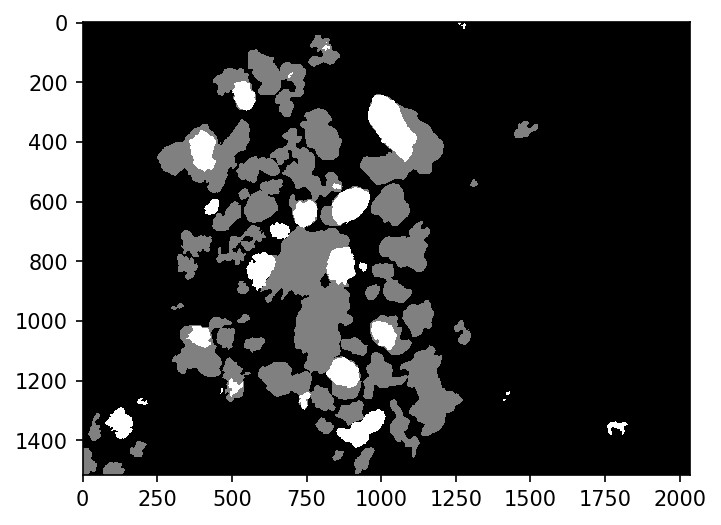

In [142]:
plotGray(img)

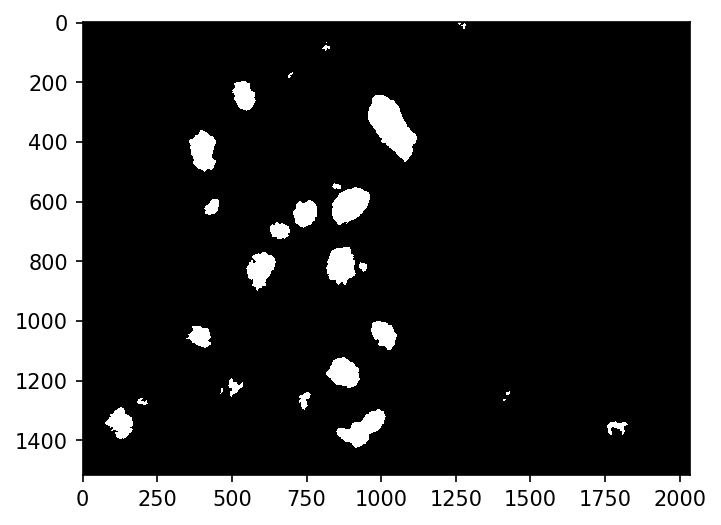

In [143]:
plotGray(mask)

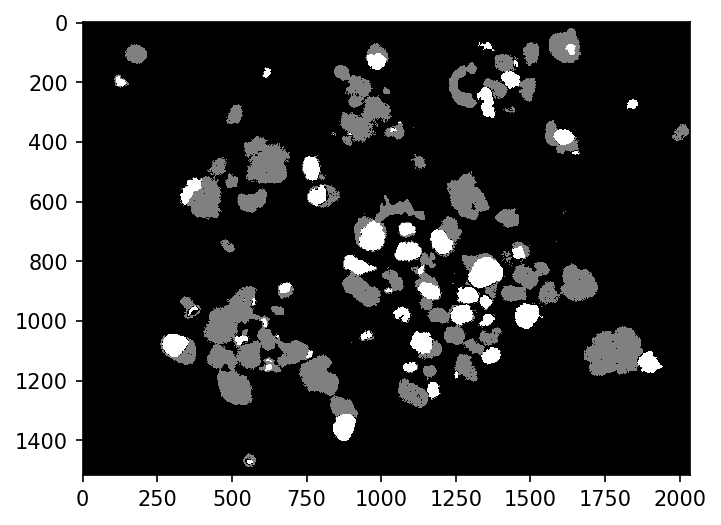

In [151]:
img = cv2.imread(img_paths[4], cv2.IMREAD_GRAYSCALE)
plotGray(img)

In [152]:
calcIslets(img)

54

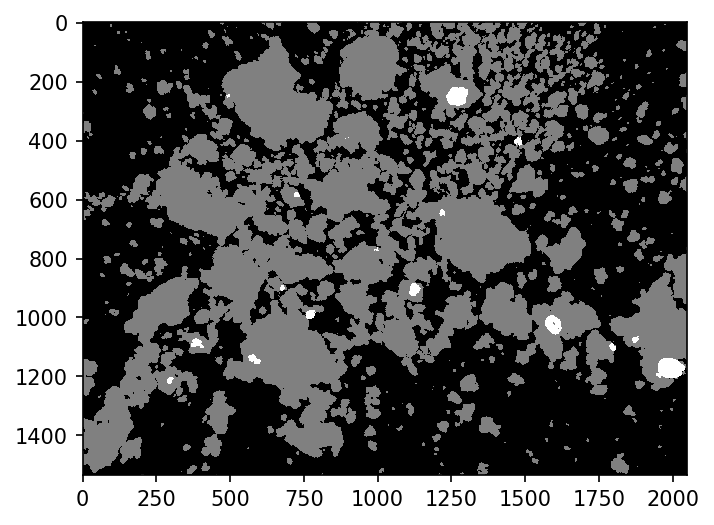

In [0]:
plotGray(cv2.imread(imp, cv2.IMREAD_GRAYSCALE))

In [0]:
cnts, areass = batchCalc([imp])

In [0]:
sum(areass[0])

454241.1190715617

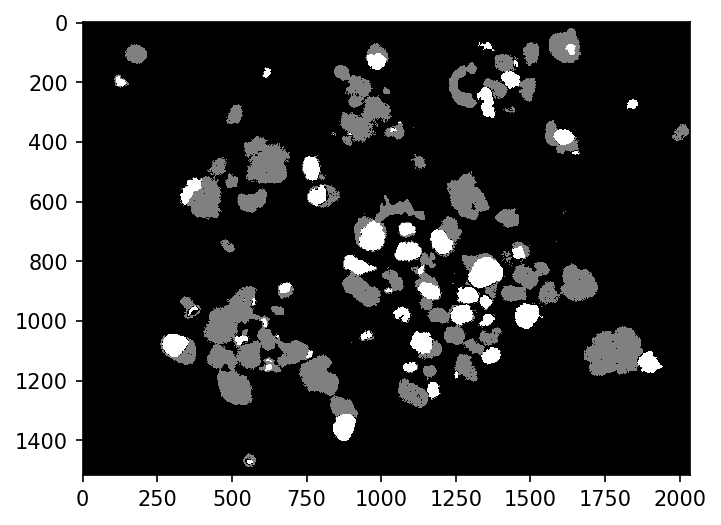

In [155]:
plotGray(img)

In [0]:
img = cv2.imread(img_paths[3], cv2.IMREAD_GRAYSCALE)
mask = cv2.inRange(img, 230, 255)
_, contours, _  = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
cont = contours[10]

In [268]:
ellipse

((391.3719787597656, 1053.1375732421875),
 (64.3434066772461, 82.31060028076172),
 123.20295715332031)

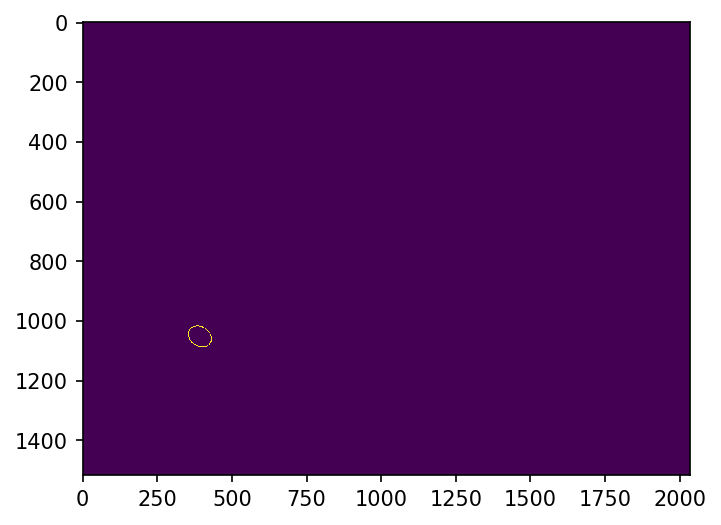

In [270]:
ellipse = cv2.fitEllipse(cont)
yy = cv2.ellipse(black, ellipse, 255, 2)
#xx = cv2.drawContours(black, el, -1, 255)
#plotGray(black)
plt.imshow(yy)
plt.show()

In [278]:
_, (w, h), _ = ellipse
a = w/2
b = h/2

vol = (4/3 * math.pi * a/2 * (b/2) **2)
print(a, b, vol)

IE = 1.767145


32.17170333862305 41.15530014038086 28531.47500937377


In [279]:
size = math.pi * a * b
print(a, b, size)

32.17170333862305 41.15530014038086 4159.582106613654


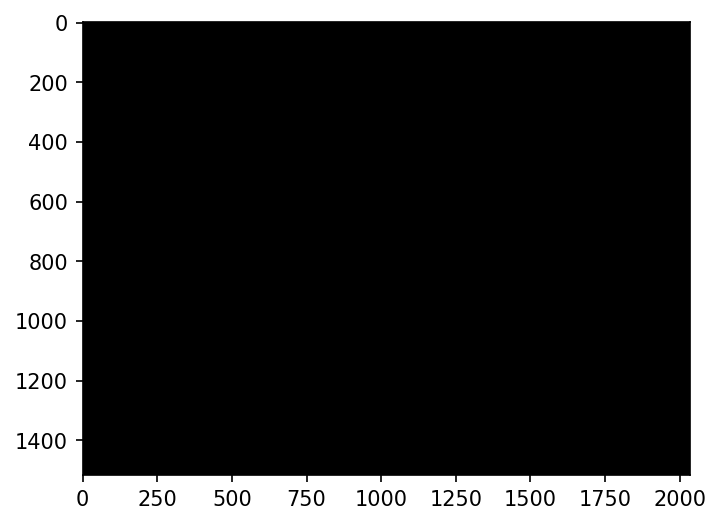

In [261]:
black = cv2.bitwise_not(cv2.inRange(img, 0, 255))
x = cv2.bitwise_and(black, black, cont)
plotGray(x)

# Eval

In [353]:
res = batchCalc(img_paths)

2 	 0.8693949030982918 	 G24_5x-single-svete_007_Exo03+GT01.png
2 	 0.9465581601003318 	 G24_5x-single-svete_008_Exo03+GT01.png
29 	 0.19991551808256394 	 G23_24x-iz140709Bd1S4-30xSF16-K4_Exo79+GT10.png
27 	 0.19619954085572927 	 G23_24x-iz140713d0-S-20xSF24-K4g5-5_Exo79+GT79.png
54 	 0.24080494737722144 	 G23_24x-iz140616d1-20xSF24-S04_Exo79+GT01.png
18 	 0.024483507684150453 	 iz180626_2cobe8_Exo79+GT01.png
18 	 0.012323123932107114 	 iz180626_1cobe8_Exo79+GT01.png


In [378]:
res = batchCalc(imgs)

cnt 	 purity 	 id
2 	 0.87 	 --
2 	 0.95 	 --
29 	 0.2 	 --
27 	 0.2 	 --
54 	 0.24 	 --
18 	 0.02 	 --
18 	 0.01 	 --
